In [193]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [194]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, accuracy_score, confusion_matrix

In [195]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [196]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [197]:
data.duplicated().sum()

data.drop_duplicates(inplace=True, ignore_index=False, subset=None, keep='first')

data.duplicated().sum()

0

<AxesSubplot:title={'center':'Correlation Matrix'}>

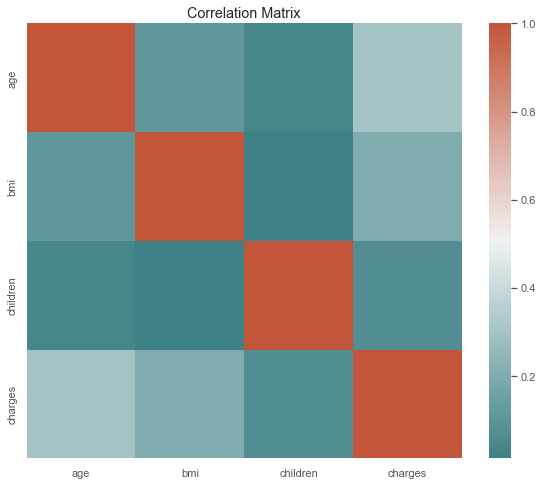

In [198]:
f,ax = plt.subplots(figsize=(10,8))

data_corr = data.corr()

ax.set_title('Correlation Matrix')
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(200,20, as_cmap=True), ax=ax, square=True)

In [199]:
le = LabelEncoder()

In [200]:
orig_reg = data.region

data.region = le.fit_transform(data.region)

data.sex = le.fit_transform(data.sex)

data.smoker = le.fit_transform(data.smoker)

In [201]:
le_reg = data.region 

orig_dic = np.unique(orig_reg)

le_dic = np.unique(le_reg)

reg_dic = dict(zip(orig_dic,le_dic))

reg_dic

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

In [202]:

x = data.drop(columns=['charges'])
y = data.charges


In [203]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x))
x

,0,1,2,3,4,5
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-0.909234,-0.507702,1.343163


In [204]:
y = scaler.fit_transform(np.array(y).reshape(-1,1))
y

array([[ 0.2978567 ],
       [-0.9543806 ],
       [-0.72937251],
       ...,
       [-0.96228744],
       [-0.9310536 ],
       [ 1.31029752]])

In [205]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [206]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_true = y_test 
y_pred = linreg.predict(x_test)

In [207]:


scr_r2 = r2_score(y_true,y_pred).round(3)

scr_r2

0.772

In [208]:
ranfor = RandomForestRegressor(n_jobs=-1, criterion='squared_error', random_state=42, n_estimators=100)

ranfor.fit(x_train,y_train)

y_pred = ranfor.predict(x_test)

mse_scr = mean_squared_error(y_true,y_pred)

mod_perf = pd.DataFrame( 
    [
    'RandomForestRegressor', mse_scr
    ]
).transpose()

mod_perf.columns = ['METHOD', 'MSE TEST']

mod_perf

C:\Users\amunv\AppData\Local\Temp\ipykernel_2860\3178709461.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,METHOD,MSE TEST
0,RandomForestRegressor,0.160228
